In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_lose = model.evaluate(test_images,test_labels)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5006 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3133 - accuracy: 0.8845
Epoch 5/5
313/313 [==============================] - 0s 891us/step - loss: 0.3447 - accuracy: 0.8748


In [2]:
import tensorflow as tf
from tensorflow.python.ops.gen_nn_ops import softmax
print(tf.__version__)

# mnist is 60,000 28x28x1 items for training and 10000 28x28x1 items for test
mnist = tf.keras.datasets.fashion_mnist 
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()
# instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
# instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images,training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)


2.3.1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)         

## To define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

* The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
* The size of the Convolution, in this case a 3x3 grid
* The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
* In the first layer, the shape of the input data.
** You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.
You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


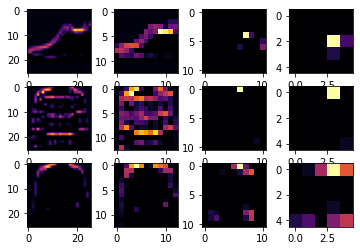

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [7]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  # Conv2D is a filter
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # MaxPooling is a way of compressing the image while enhancing features
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  # Dense is a neural network that matches the filters to the labels
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.3.1
11493376/11490434 [==============================] - 4s 0us/step
Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1465 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0320 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0080 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0054 - accuracy: 0.9981
Ep